In [2]:
import csv
import pandas as pd

In [3]:
path = 'diabetes.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(len(df))
df.info()

768
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
features = df.drop('Outcome',axis=1).columns.values


In [9]:
zero_features = []
for f in features:
    if df[df[f]==0][f].count() > 0:
        zero_features.append(f)
zero_features

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
import numpy as np

In [11]:
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_month = np.array(df['Pregnancies'].value_counts().index)
print(preg_proportion)
print(preg_month)
preg_proportion_prec = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)
print(preg_proportion_prec)

[135 111 103  75  68  57  50  45  38  28  24  11  10   9   2   1   1]
[ 1  0  2  3  4  5  6  7  8  9 10 11 13 12 14 15 17]
[17 14 13  9  8  7  6  5  4  3  3  1  1  1  0  0  0]


In [12]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,
                    'precentage_proportion':preg_proportion_prec})
preg.set_index(['month'],inplace=True)
preg

,count_of_preg_prop,precentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

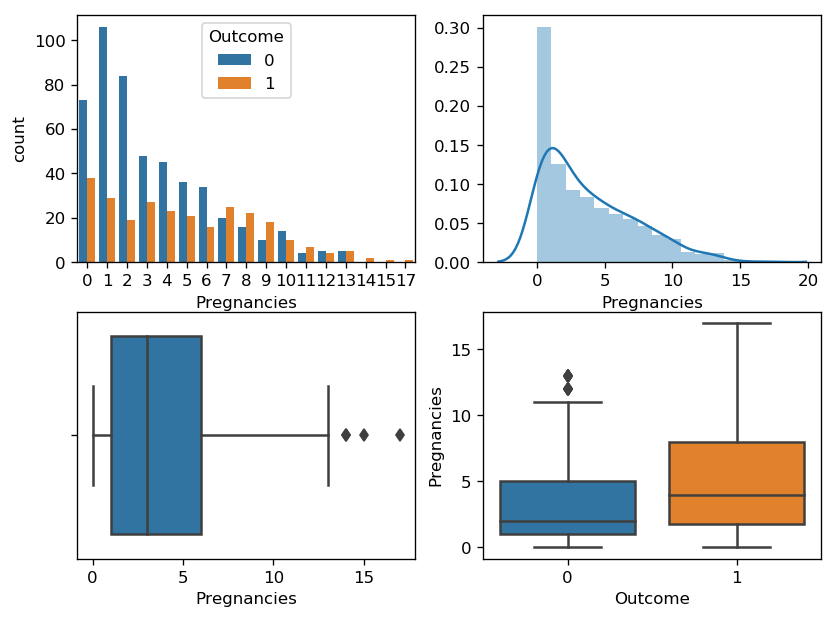

In [14]:
f,ax = plt.subplots(nrows=2,ncols=2,dpi=120,figsize=(8,6))
p00=sns.countplot('Pregnancies',data=df,hue='Outcome',ax=ax[0][0])
p10=sns.distplot(df['Pregnancies'],ax=ax[0][1])
p10=sns.boxplot(x=df['Pregnancies'],ax=ax[1][0])
p11=sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=ax[1][1])

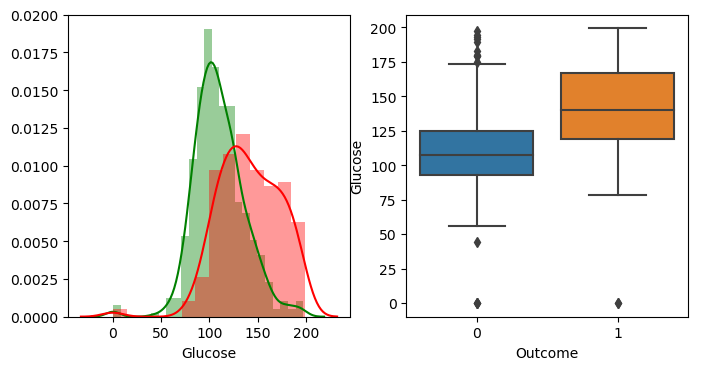

In [15]:
f,ax = plt.subplots(nrows=1,ncols=2,dpi=100,figsize=(8,4))
p00=sns.distplot(df[df['Outcome']==0]['Glucose'],ax=ax[0],color='green',label='No')
sns.distplot(df[df['Outcome']==1]['Glucose'],ax=ax[0],color='red',label='No')
p01=sns.boxplot(x='Outcome',y='Glucose',data=df,ax=ax[1])

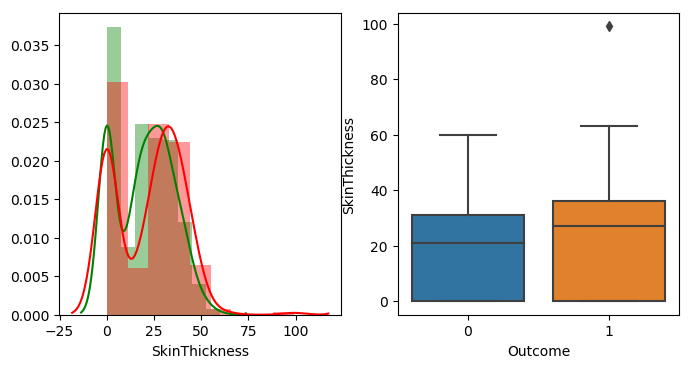

In [16]:
label = 'SkinThickness'
f,ax = plt.subplots(nrows=1,ncols=2,dpi=100,figsize=(8,4))
p00=sns.distplot(df[df['Outcome']==0][label],ax=ax[0],color='green',label='No')
sns.distplot(df[df['Outcome']==1][label],ax=ax[0],color='red',label='No')
p01=sns.boxplot(x='Outcome',y=label,data=df,ax=ax[1])

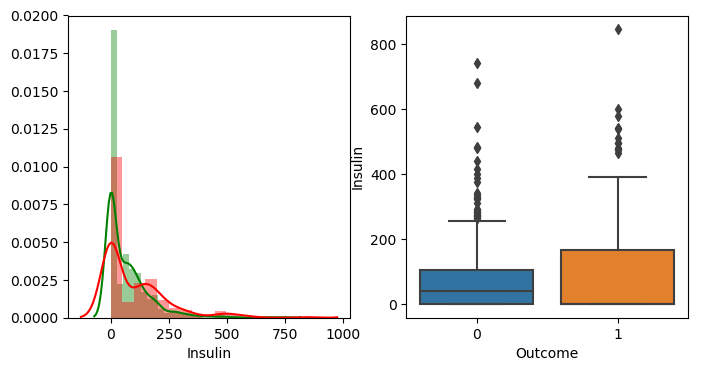

In [17]:
label = 'Insulin'
f,ax = plt.subplots(nrows=1,ncols=2,dpi=100,figsize=(8,4))
p00=sns.distplot(df[df['Outcome']==0][label],ax=ax[0],color='green',label='No')
sns.distplot(df[df['Outcome']==1][label],ax=ax[0],color='red',label='No')
p01=sns.boxplot(x='Outcome',y=label,data=df,ax=ax[1])

In [18]:
# x_arr = []
# y_arr = []
# with open(path,'r') as f:
#     csv_reader = csv.reader(f)
#     rows = list(csv_reader)
#     for row in rows[1:]:
#         print(row)
#         _,x,y = row
#         x = float(x)
#         y = float(y)
#         x_arr.append(x)
#         y_arr.append(y)


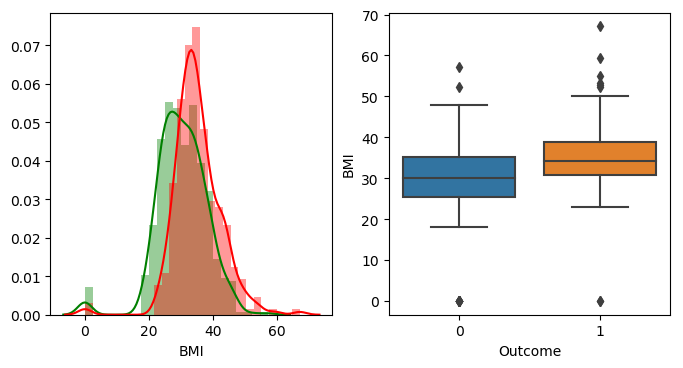

In [19]:
label = 'BMI'
f,ax = plt.subplots(nrows=1,ncols=2,dpi=100,figsize=(8,4))
p00=sns.distplot(df[df['Outcome']==0][label],ax=ax[0],color='green',label='No')
sns.distplot(df[df['Outcome']==1][label],ax=ax[0],color='red',label='No')
p01=sns.boxplot(x='Outcome',y=label,data=df,ax=ax[1])

/Users/liuchu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/liuchu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


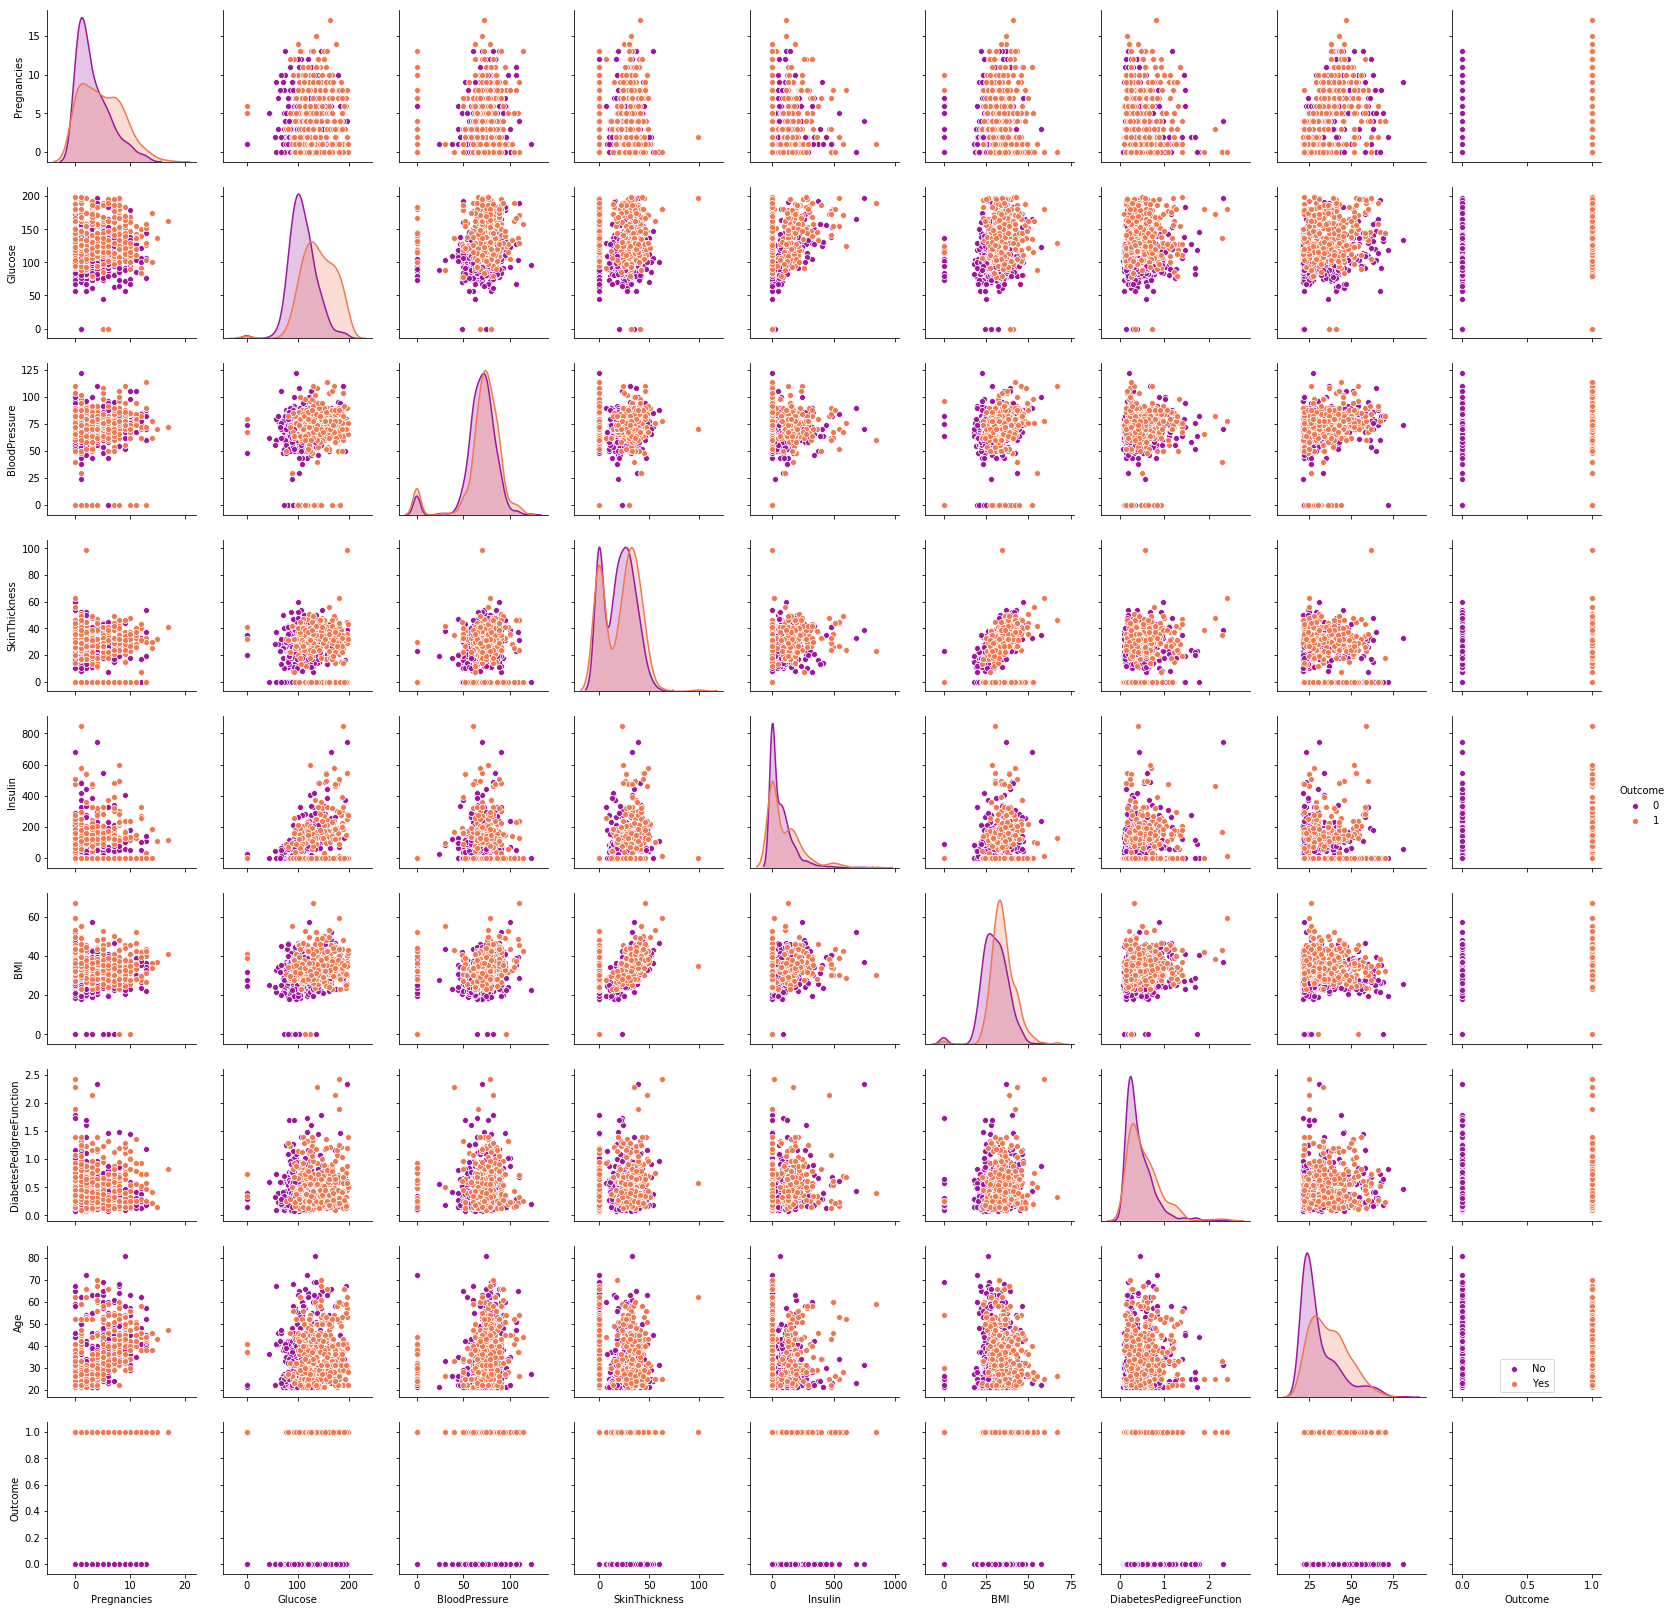

In [20]:
sns.pairplot(df,hue='Outcome',palette='plasma')
plt.legend(['No','Yes'])
plt.show()

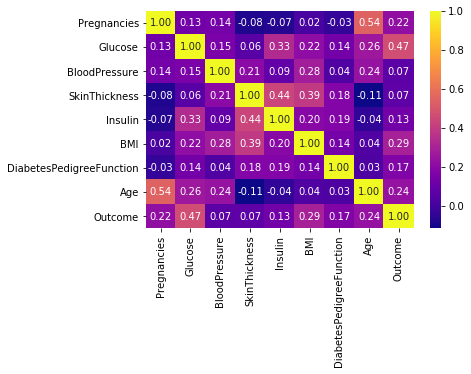

In [21]:
sns.heatmap(df.corr(),fmt='.2f',annot=True,cmap='plasma')

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [23]:
df[df['Glucose']==0]['Glucose'].count()
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df[df['Glucose']==0]['Glucose'].count()

0

In [24]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
5,5,116.0,74,0,0,25.6,0.201,30,0
6,3,78.0,50,32,88,31.0,0.248,26,1
7,10,115.0,0,0,0,35.3,0.134,29,0
8,2,197.0,70,45,543,30.5,0.158,53,1
9,8,125.0,96,0,0,0.0,0.232,54,1


In [25]:
df[df['BloodPressure']==0]['BloodPressure'].count()
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())

In [26]:
df[df['SkinThickness']==0]['SkinThickness'].count()
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [27]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.536458,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1
5,5,116.0,74,20.536458,0,25.6,0.201,30,0
6,3,78.0,50,32.000000,88,31.0,0.248,26,1
7,10,115.0,72,20.536458,0,35.3,0.134,29,0
8,2,197.0,70,45.000000,543,30.5,0.158,53,1
9,8,125.0,96,20.536458,0,0.0,0.232,54,1


In [28]:
df[df['Insulin']==0]['Insulin'].count()
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [29]:
df[df['BMI']==0]['BMI'].count()
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.000000,72.0000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.500000,31.2500,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.0000,1.00000,1.00


In [31]:
features=df.drop('Outcome',axis=1).columns.values

In [32]:
def iqr_outliers(df):
    out=[]
    q1=df.quantile(0.25)
    q2=df.quantile(0.75)
    iqr=q2-q1
    lower = q1-1.5*iqr
    upper = q2+1.5*iqr
    for i in df:
        if i > upper or i < lower:
            out.append(i)
    print('outliers:',out)

In [33]:
for feature in features:
    print(feature,end=' ')
    iqr_outliers(df[feature])
    print('-'*50)

Pregnancies outliers: [15, 17, 14, 14]
--------------------------------------------------
Glucose outliers: []
--------------------------------------------------
BloodPressure outliers: [30, 110, 108, 122, 30, 110, 108, 110, 24, 38, 106, 106, 106, 114]
--------------------------------------------------
SkinThickness outliers: [60.0, 54.0, 51.0, 56.0, 50.0, 54.0, 50.0, 52.0, 63.0, 52.0, 99.0, 50.0]
--------------------------------------------------
Insulin outliers: [543.0, 846.0, 300.0, 342.0, 304.0, 495.0, 325.0, 284.0, 485.0, 285.0, 495.0, 318.0, 280.0, 478.0, 744.0, 370.0, 680.0, 402.0, 375.0, 278.0, 545.0, 360.0, 325.0, 293.0, 465.0, 325.0, 285.0, 415.0, 275.0, 579.0, 310.0, 474.0, 277.0, 328.0, 480.0, 326.0, 274.0, 330.0, 600.0, 293.0, 321.0, 440.0, 540.0, 480.0, 335.0, 387.0, 291.0, 392.0, 510.0]
--------------------------------------------------
BMI outliers: [53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]
--------------------------------------------------
DiabetesPedigreeFunct

In [34]:
def del_outliers(df,feature):
    
    q1 = df[feature].quantile(0.25)
    q2 = df[feature].quantile(0.75)
    gap = q2 - q1
    lower = q1 - 1.5*gap
    upper = q2 + 1.5*gap
    
    df.drop(df[df[feature] > upper].index,inplace=True)
    df.drop(df[df[feature] < lower].index,inplace=True)
    

In [35]:
for feature in features:
    del_outliers(df,feature)

In [36]:
features

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,0
5,5,116.0,74,20.536458,30.5,25.6,0.201,30,0


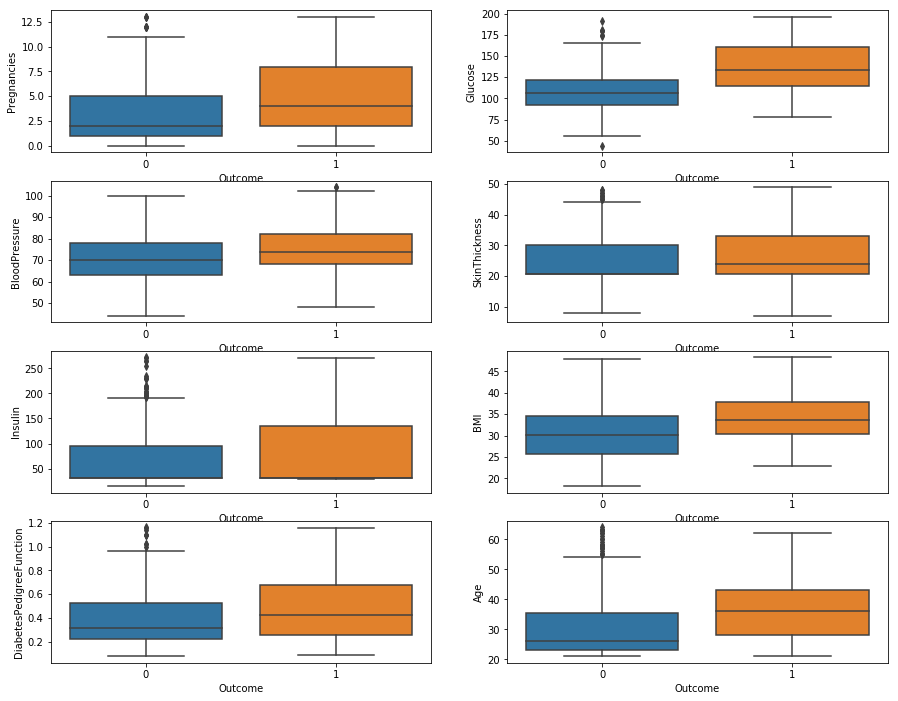

In [38]:
f,ax = plt.subplots(nrows=4,ncols=2,figsize=(15,12))
sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=ax[0][0])
sns.boxplot(x='Outcome',y='Glucose',data=df,ax=ax[0][1])
sns.boxplot(x='Outcome',y='BloodPressure',data=df,ax=ax[1][0])
sns.boxplot(x='Outcome',y='SkinThickness',data=df,ax=ax[1][1])
sns.boxplot(x='Outcome',y='Insulin',data=df,ax=ax[2][0])
sns.boxplot(x='Outcome',y='BMI',data=df,ax=ax[2][1])
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=ax[3][0])
sns.boxplot(x='Outcome',y='Age',data=df,ax=ax[3][1])

In [39]:
df.var()

Pregnancies                   10.452259
Glucose                      788.878834
BloodPressure                115.670518
SkinThickness                 71.807153
Insulin                     3653.173670
BMI                           39.005048
DiabetesPedigreeFunction       0.059633
Age                          110.123706
Outcome                        0.215764
dtype: float64

In [40]:

df[df['Insulin']==0]['Insulin'].count()
df['Insulin'].median()


30.5

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,0
5,5,116.0,74,20.536458,30.5,25.6,0.201,30,0


In [42]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(512, 8)
(512,)
(128, 8)
(128,)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

In [45]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
x_new = pca.transform(x)

In [48]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [49]:
x_new

array([[-37.66442025,  38.04679719],
       [-46.95302261, -26.86447737],
       [-33.48548038,  68.36284197],
       ...,
       [ 38.41624847,  -2.57322105],
       [-41.4757926 ,  14.55671891],
       [-45.62353179, -19.52980759]])

In [50]:
xs=x_new[:,0]
ys=x_new[:,1]

Text(0.5,1,'Dependency of Data with Outcome')

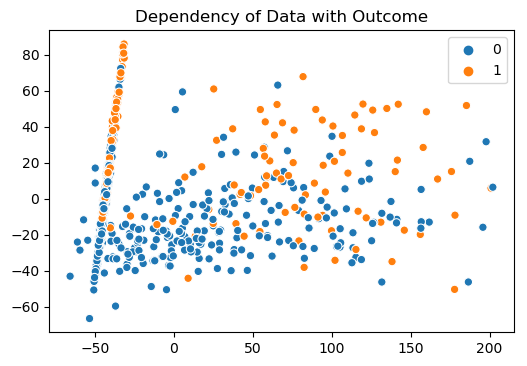

In [52]:
plt.figure(dpi=100)
sns.scatterplot(x=xs,y=ys,hue=y).set_title('Dependency of Data with Outcome')

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

In [57]:
param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

In [59]:
grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv=10,refit=True)

In [63]:
grid_dtc.fit(x_train_std,y_train)
print('best score ==> ',grid_dtc.best_score_)
print('param ==>',grid_dtc.best_params_)
print('accuracy on train set ==>',grid_dtc.score(x_train_std,y_train))
print('accuray on test set ==>',grid_dtc.score(x_test_std,y_test))

best score ==>  0.767578125
param ==> {'criterion': 'entropy', 'max_depth': 6}
accuracy on train set ==> 0.857421875
accuray on test set ==> 0.75


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,25,30,50]}
grid_dtc = GridSearchCV(knn,param_grid,scoring='accuracy',cv=10,refit=True)

In [65]:
grid_dtc.fit(x_train_std,y_train)
print('best score ==> ',grid_dtc.best_score_)
print('param ==>',grid_dtc.best_params_)
print('accuracy on train set ==>',grid_dtc.score(x_train_std,y_train))
print('accuray on test set ==>',grid_dtc.score(x_test_std,y_test))

best score ==>  0.76953125
param ==> {'n_neighbors': 25}
accuracy on train set ==> 0.783203125
accuray on test set ==> 0.765625


In [66]:
from sklearn.svm import SVC
svc = SVC(probability=True)

In [67]:
param_grid = {'kernel':['rbf','linear'],'C':[0.01,0.1,1,0.001],'gamma':[0.1,0.01,0.2,0.4]}
grid_dtc = GridSearchCV(svc,param_grid,scoring='accuracy',cv=10,refit=True)

In [68]:
grid_dtc.fit(x_train_std,y_train)
print('best score ==> ',grid_dtc.best_score_)
print('param ==>',grid_dtc.best_params_)
print('accuracy on train set ==>',grid_dtc.score(x_train_std,y_train))
print('accuray on test set ==>',grid_dtc.score(x_test_std,y_test))

best score ==>  0.791015625
param ==> {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy on train set ==> 0.798828125
accuray on test set ==> 0.7421875


In [69]:
from sklearn.ensemble import VotingClassifier
classifiers = [('knn',knn),('tree',grid_dtc),('svc',svc)]
vtc = VotingClassifier(classifiers,voting='hard')

In [71]:
vtc.fit(x_train_std,y_train)
print('accuracy on test set',vtc.score(x_test_std,y_test))

accuracy on test set 0.75


/Users/liuchu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [72]:
#分割线乳腺癌数据分析

In [73]:
path = 'bc.csv'

In [148]:
df1 = pd.read_csv(path)

In [150]:
df1.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [77]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [79]:
df1.shape

(569, 33)

In [84]:
features = df1.drop('Unnamed: 32',axis=1).columns.values

In [144]:
for feature in features:
    print(feature)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [92]:
df1=df1[features]

In [94]:
df1['diagnosis'] = df1['diagnosis'].replace('M',1)

In [96]:
df1['diagnosis'] = df1['diagnosis'].replace('B',0)

In [97]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
df1 = df1.drop('id',axis=1)

In [99]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [153]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [107]:
x_values = df1.iloc[:,1:].values
y_values = df1.iloc[:,0].values

In [152]:
x_values

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_values_std = scaler.fit_transform(x_values)

In [164]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_values_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [165]:
x_new = pca.transform(x_values_std)

In [166]:
x=x_new[:,0]
y=x_new[:,1]

Text(0.5,1,'PCA')

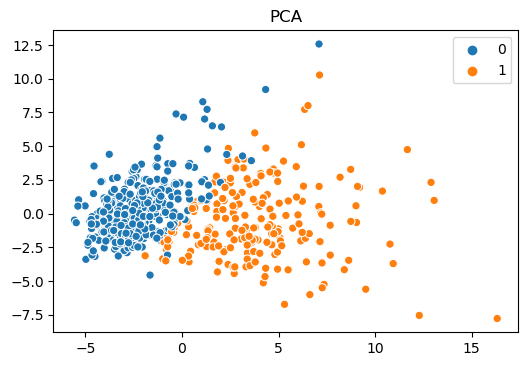

In [167]:
plt.figure(dpi=100)
sns.scatterplot(x=x,y=y,hue=y_values).set_title('PCA')

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [120]:
lda = LinearDiscriminantAnalysis()

In [121]:
lda.fit(x_values,y_values)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_values_std,y_values,test_size=0.20,random_state=0)

In [128]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [129]:
print('accuracy on test set',lda.score(x_test,y_test))

accuracy on test set 0.9649122807017544


In [182]:
df1[df1['diagnosis']=='B']

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409,NaN
48,857155,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,...,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,NaN
49,857156,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917,NaN
50,857343,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,...,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563,NaN
51,857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,...,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025,NaN
52,857374,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,...,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408,NaN


In [141]:
df1.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean'],
      dtype=object)

/Users/liuchu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/liuchu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


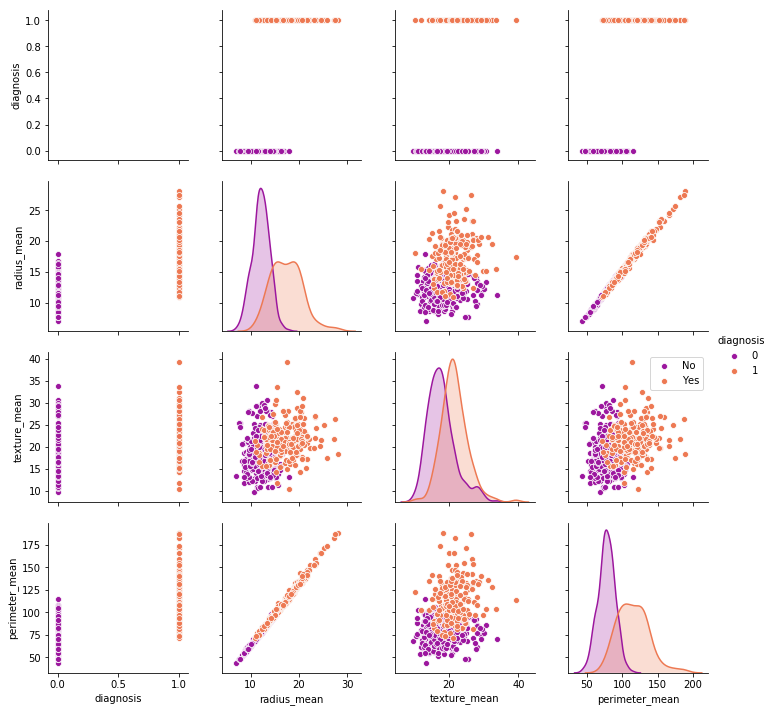

In [137]:
sns.pairplot(df1,hue='diagnosis',palette='plasma')
plt.legend(['No','Yes'])
plt.show()

In [183]:
from sklearn.decomposition import FactorAnalysis


In [184]:
fa = FactorAnalysis(n_components=2)
two_dim = fa.fit_transform(x_values_std)
two_dim

array([[ 1.19310634,  2.8048741 ],
       [ 1.76230893, -1.4519412 ],
       [ 1.57786042,  0.39070016],
       ...,
       [ 0.68560388, -0.48945758],
       [ 1.91368319,  2.48354259],
       [-1.80382795, -0.39511722]])

-24.11914772570705

Text(0.5,1,'FA')

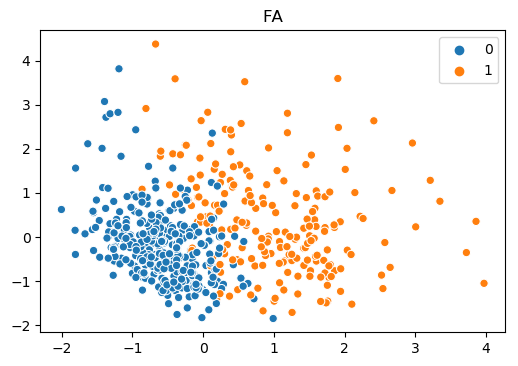

In [185]:
x=two_dim[:,0]
y=two_dim[:,1]
plt.figure(dpi=100)
sns.scatterplot(x=x,y=y,hue=y_values).set_title('FA')

In [1]:
path='122-132期用户明细.sav'

In [2]:
import pandas as pd

In [4]:
df1=pd.read_spss(path)

In [8]:
columns = df1.columns.values

In [10]:
len(columns)

80

In [11]:
columns

array(['用户id', '期次', '年级', '渠道组', '渠道', '渠道明细', '城市等级', '班主任花名', '是否登录',
       '是否关注', '设备类型', 'U1到课', 'U2到课', 'U3到课', 'U4到课', 'U5到课', '直播到课次数',
       'U1完课', 'U2完课', 'U3完课', 'U4完课', 'U5完课', '完课次数', '到课完课率', 'U1回放',
       'U2回放', 'U3回放', 'U4回放', 'U5回放', 'U1发言次数', 'U2发言次数', 'U3发言次数',
       'U4发言次数', 'U5发言次数', '课均发言次数', '是否续报', 'U1参课', 'U2参课', 'U3参课',
       'U4参课', 'U5参课', '参课次数', 'U1课后加载', 'U2课后加载', 'U4课后加载', 'U5课后加载',
       '课后代码题参与数', '课后代码题参与率', 'U1直播加载', 'U2直播加载', 'U3直播加载', 'U4直播加载',
       '直播代码题参与数', 'U1课后最大题目序号', 'U2课后最大题目序号', 'U4课后最大题目序号', 'U5课后最大题目序号',
       'U1直播最大题目序号', 'U2直播最大题目序号', 'U4直播最大题目序号', 'U5直播最大题目序号', 'U1课后完成',
       'U2课后完成', 'U4课后完成', 'U5课后完成', '课后代码题完成总数', '课后代码题完成率', 'U1直播完成',
       'U2直播完成', 'U4直播完成', 'U5直播完成', '直播代码题完成总数', '直播代码题正确率', '渠道分类',
       '设备分类', '城市分类', '到课完课率聚类', '代码题正确率聚类', '子渠道分类', 'filter_$'],
      dtype=object)